## Flower Classification Project Model Deployment Using Gradio

### The objective of this flower classification project is that  to predict the class of flower using computer vision techniques such as CNN and ResNet model, choose the best performing model and deploy using gradio

In [1]:
# Importing the required dependencies

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

### Downloading Dataset

We are downloading dataset from mentaioned path given in the code below. We are using tf.keras.utils.get_file to download the data in keras cache directory using pathlib module

In [2]:
# importing the dataset
import pathlib

dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir=pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
batch_size=32
image_height=180
image_width=180

In [4]:
# Splitting into train and validation dataset

train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=456,
    image_size=(image_height,image_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
# Creating validation subset

val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=456,
    image_size=(image_height,image_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


# Checking class names of flowers

Here we are checking what are the different classes that we have in flower dataset. We have total 5 classes such as daisy, dandelion, roses, sunflowers,tulips

In [6]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Visualize the data

Here we  will be visualizing our data using matplotlib library. We will be checking for diifferent classes and images of flowers that we have in our dataset

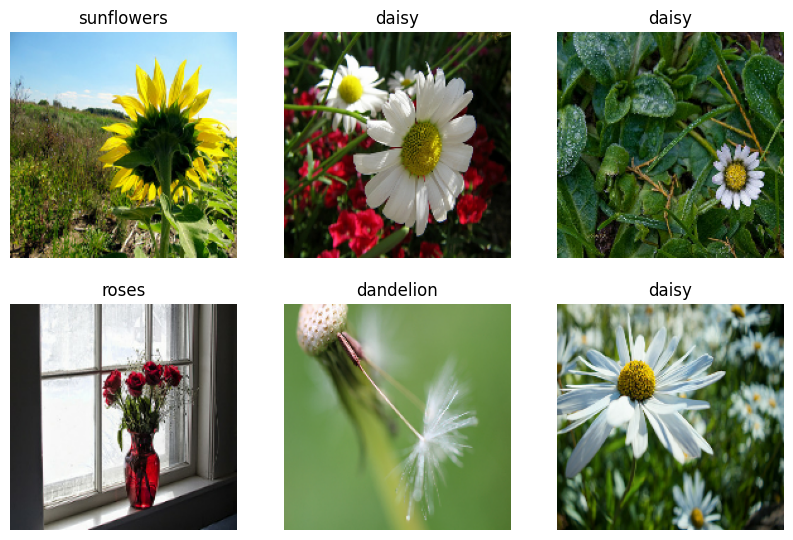

In [7]:
# Visualizing the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):

    for i in range(6):

        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

### Using ResNet for flower classification
The Deep Learning architectures become deeper and deeper (adding more layers) to solve more and more complex tasks which also helped in improving the performance of clssification and recognition tasks and also making them robust. But when we go on adding more layers to the neural network, it becomes very much difficult to train and the accuracy of the model starts saturating and then degrades which is the case we saw with CNN. Here comes the ResNet to rescue us from that scenario, and helps to resolve this problem

### About ResNet model
Below we are using pretrained model for ResNet and we have added dense and flatten layers for pretrained model then we are compiling our model and then displaying model summary to see the total number of trainable and non-trainable parameters that we have

In [8]:
# Using ResNet Model to predict the flower class

resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                              input_shape=(180,180,3),
                                              pooling='avg',
                                              classes=5,
                                              weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy'])

resnet_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


# Training the model using epochs

Here we will be using 10 epochs to train our model and for each of the epochs we will be checking how our model training and validation accuracy is responding and we will be also checking for the loss

In [9]:
# Training epochs

epochs=10
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
92/92 [==============================] - 582s 6s/step - loss: 0.7149 - accuracy: 0.7718 - val_loss: 0.4248 - val_accuracy: 0.8488
Epoch 2/10
92/92 [==============================] - 542s 6s/step - loss: 0.2676 - accuracy: 0.9009 - val_loss: 0.4178 - val_accuracy: 0.8474
Epoch 3/10
92/92 [==============================] - 584s 6s/step - loss: 0.1654 - accuracy: 0.9462 - val_loss: 0.4050 - val_accuracy: 0.8651
Epoch 4/10
92/92 [==============================] - 582s 6s/step - loss: 0.1010 - accuracy: 0.9670 - val_loss: 0.3922 - val_accuracy: 0.8747
Epoch 5/10
92/92 [==============================] - 591s 6s/step - loss: 0.0534 - accuracy: 0.9864 - val_loss: 0.4685 - val_accuracy: 0.8610
Epoch 6/10
92/92 [==============================] - 565s 6s/step - loss: 0.0365 - accuracy: 0.9911 - val_loss: 0.4210 - val_accuracy: 0.8883
Epoch 7/10
92/92 [==============================] - 557s 6s/step - loss: 0.0224 - accuracy: 0.9959 - val_loss: 0.4177 - val_accuracy: 0.8747
Epoch 8/10
92

# Plotting graph for comparison of training and validation accuracy

Here we will be using matplotlib library to check for training and validation accuracy and for the comparison between the two

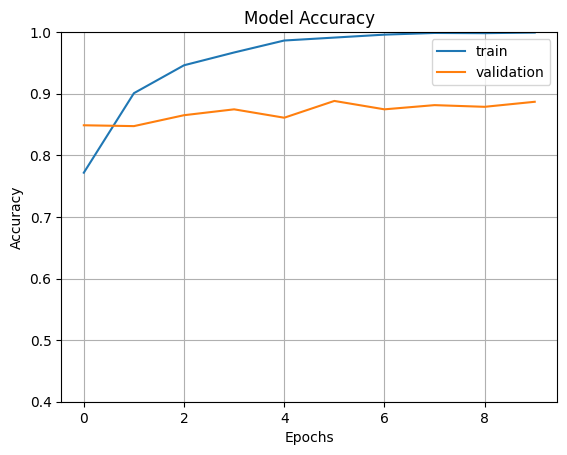

In [10]:
# Plotting training and validation accuracy

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

# Visualizing image of roses and tulips using cv2

OpenCV-Python is a library of Python designed to slove Computer Vision problems. cv2.imshow() method is used to display an image in a window. The window automatically fits the image size.

In [28]:
import cv2
roses = list(data_dir.glob('roses/*'))
image = cv2.imread(str(roses[5]))
image_resized = cv2.resize(image, (image_height,image_width))
image_1 = np.expand_dims(image_resized,axis=0)

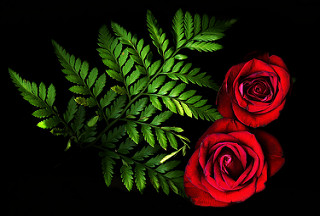

In [29]:
PIL.Image.open(str(roses[5]))

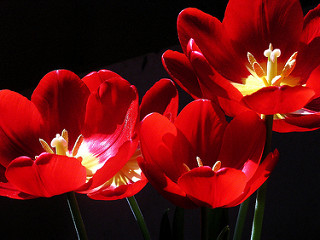

In [31]:
import cv2
tulips = list(data_dir.glob('tulips/*'))
image = cv2.imread(str(tulips[3]))
image_resized = cv2.resize(image, (image_height,image_width))
image_2 = np.expand_dims(image_resized,axis=0)

PIL.Image.open(str(tulips[3]))

In [32]:
pred_1=resnet_model.predict(image_1)
pred_2=resnet_model.predict(image_2)

1/1 [==============================] - 0s 152ms/step


In [33]:
output_class=class_names[np.argmax(pred_1)]
print("The predicted class is",output_class)

The predicted class is roses


In [34]:
output_class=class_names[np.argmax(pred_2)]
print("The predicted class is",output_class)

The predicted class is tulips


# Conclusion:

We can clearly see over here that using RESNET model our validation accuracy has improved and it is close to 90% where as it was not even 70% when we built model using CNN model. Hence we have seen here that RESNET model outperformed CNN model when we are dealing with large dataset of images.

In [35]:
!pip install -q gradio                           # Model Deployment Using Gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.1 MB/s eta 0:

In [39]:
def predict_image(img):                            # we defined function which would take input image
    img_4d=img.reshape(-1,180,180,3)
    prediction=resnet_model.predict(img_4d)[0]     # predict the result using resnet model & then we get output using gradio
    return {class_names[i]: float(prediction[i]) for i in range(5)}

### From the below code of  model deployment using gradio, we dont have web link & gradio interface as it is expired after sometime, because of that we can take screenshot, click of that GUI graphical user interface of gradio for reference purpose, We are not able to run, execute all code again because training process of model epochs take much more time !!

In [40]:
# Importing gradio
import gradio as gr

image = gr.inputs.Image(shape=(180,180))       # Input image
label = gr.outputs.Label(num_top_classes=5)    # Gives output(label)

# After executing click on link that redirected to the interface,deploy model using gradio
app=gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default')
app.launch(debug=False)

<ipython-input-40-5e39939ea762>:4: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(180,180))       # input image
<ipython-input-40-5e39939ea762>:4: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(180,180))       # input image
<ipython-input-40-5e39939ea762>:5: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=5)    # gives output(label)
<ipython-input-40-5e39939ea762>:5: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=5)    # gives output(label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### We have done all the necessary steps for building the computer vision Resnet model & deploy model using gradio, we get  88.69% validation accuracy by ResNet model and after deploying model using gradio, ResNet Model will able to predict the flower class very well !! 